Mounted at /content/drive


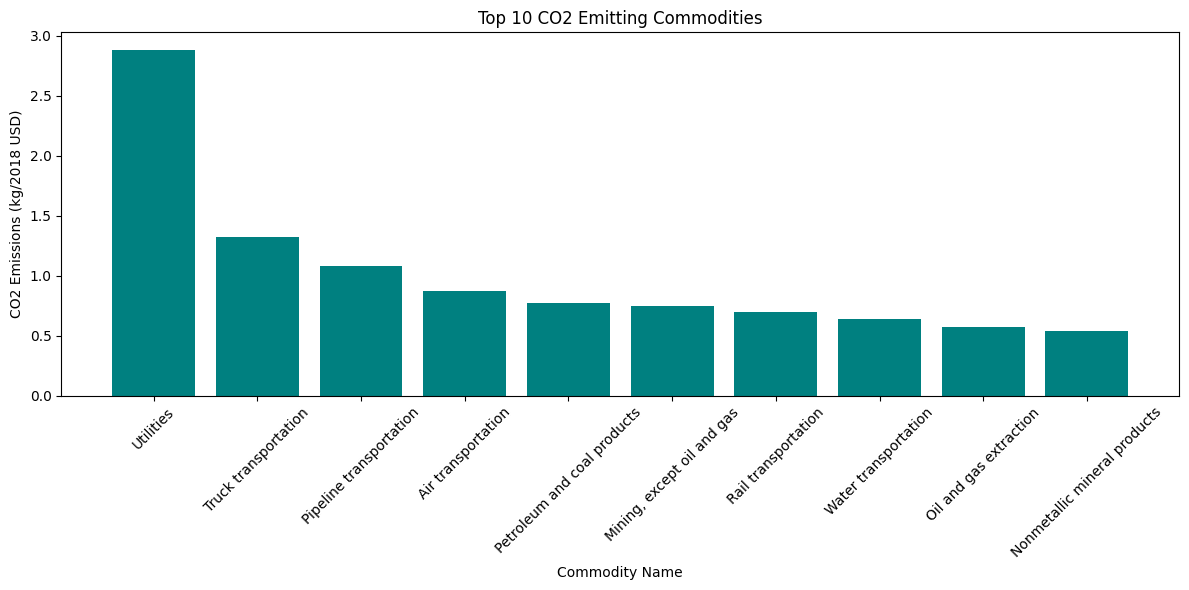

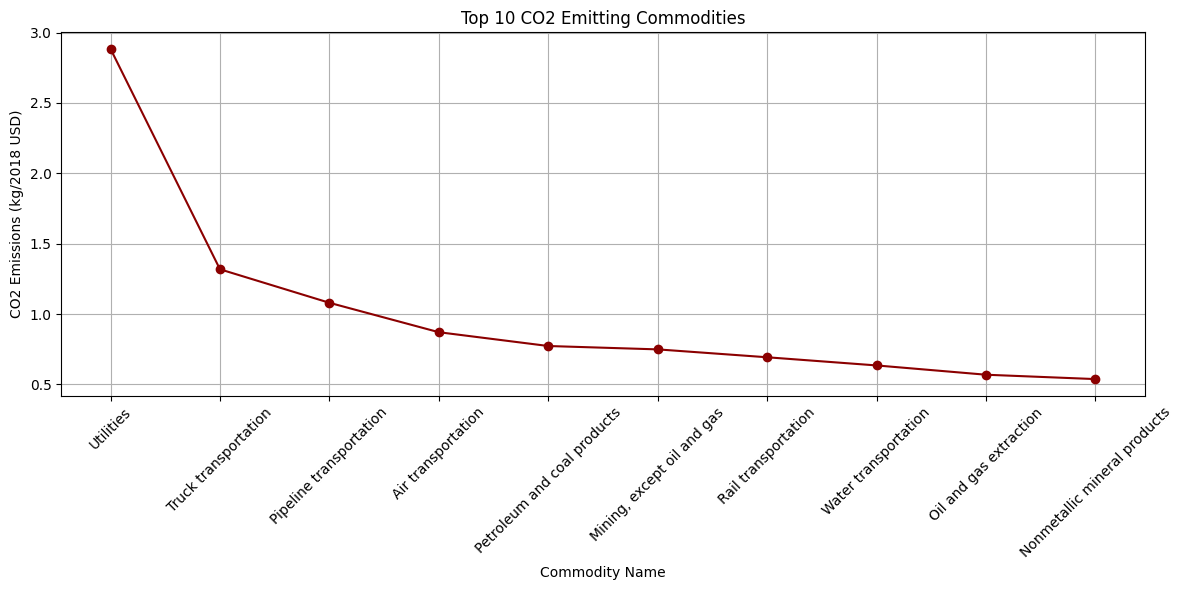

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Step 2: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Set correct path to your file inside Drive
# Make sure this path is correct
file_path = '/content/drive/MyDrive/Colab Notebooks/supplyfiles.csv' # <--- **Please update this path to your file's location**

# Step 4: Read the CSV file
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()  # Clean column names

# Step 5: Filter for carbon dioxide only
co2_df = df[df['Substance'].str.lower() == 'carbon dioxide']

# Step 6: Sort and get top 10
top10 = co2_df.sort_values(by='Supply Chain Emission Factors with Margins', ascending=False).head(10)

# Step 7: Plot
plt.figure(figsize=(12, 6))
plt.bar(top10['Commodity Name'], top10['Supply Chain Emission Factors with Margins'], color='teal')
plt.xlabel('Commodity Name')
plt.ylabel('CO2 Emissions (kg/2018 USD)')
plt.title('Top 10 CO2 Emitting Commodities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(top10['Commodity Name'], top10['Supply Chain Emission Factors with Margins'], marker='o', linestyle='-', color='darkred')
plt.xlabel('Commodity Name')
plt.ylabel('CO2 Emissions (kg/2018 USD)')
plt.title('Top 10 CO2 Emitting Commodities')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Commodity Code                                          264 non-null    object 
 1   Commodity Name                                          264 non-null    object 
 2   Substance                                               264 non-null    object 
 3   Unit                                                    264 non-null    object 
 4   Supply Chain Emission Factors without Margins           264 non-null    float64
 5   Margins of Supply Chain Emission Factors                264 non-null    float64
 6   Supply Chain Emission Factors with Margins              264 non-null    float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ Reliability

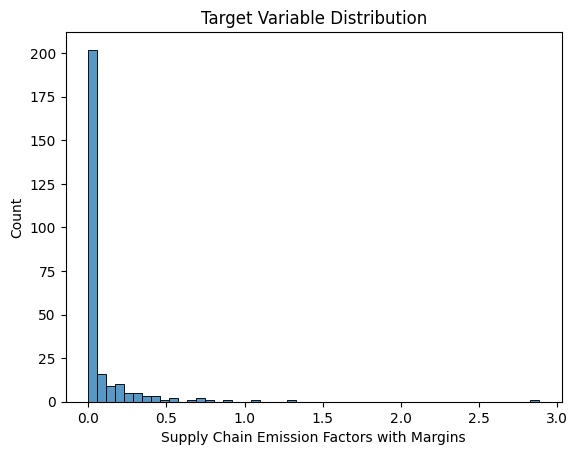

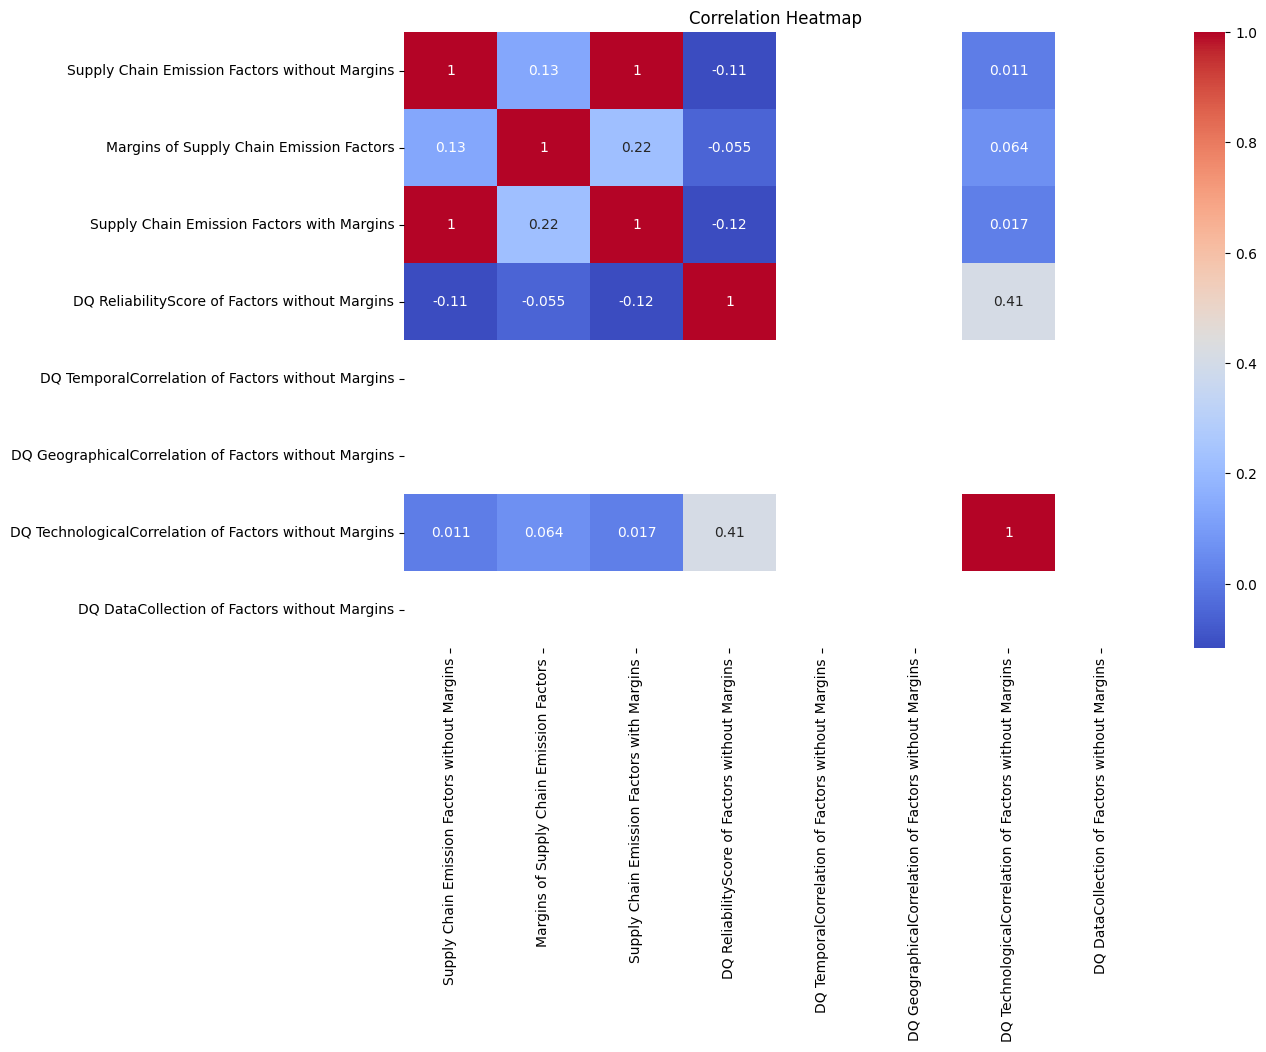

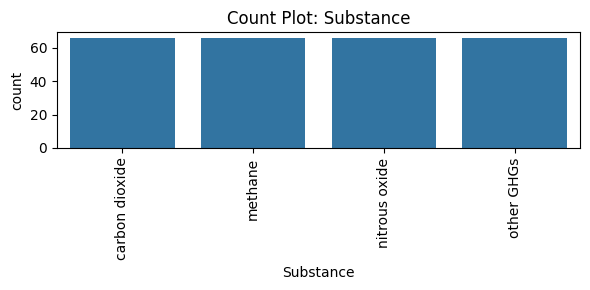

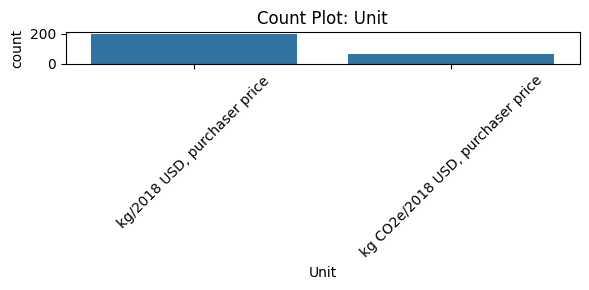

RMSE: 0.0143
R^2 Score: 0.9917


['models/scaler.pkl']

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/MyDrive/Colab Notebooks/supplyfiles.csv'
df = pd.read_csv(file_path)
df.head()
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())
# Dropping columns that were identified as not existing or not needed
df.drop(columns=['Unnamed: 7', 'Name', 'Code', 'Year'], errors='ignore', inplace=True)
# ... data loading and initial cleaning ...


# Visualize the target distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50)
plt.title('Target Variable Distribution')
plt.show()

# Continue with feature encoding, scaling, splitting, etc.
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

substance_map = {'carbon dioxide': 0, 'methane': 1, 'nitrous oxide': 2, 'other GHGs': 3}
unit_map = {'kg/2018 USD, purchaser price': 0, 'kg CO2e/2018 USD, purchaser price': 1}
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['Substance'] = df['Substance'].map(substance_map)
df['Unit'] = df['Unit'].map(unit_map)
X = df.drop(columns=['Supply Chain Emission Factors with Margins', 'Commodity Code', 'Commodity Name'])
y = df['Supply Chain Emission Factors with Margins']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y_pred = model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
import os
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ...[your previous code for data preparation]...

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save model and scaler
joblib.dump(model, 'models/final_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

print(f"RMSE: {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")
import os
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ...[your previous code for data preparation]...

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Create directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save best model and scaler
joblib.dump(best_model, 'models/final_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

